In [1]:
import datetime
import time
import pandas as pd
from tqdm.notebook import tqdm
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.DataFrame()
for chunk in tqdm(pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/files/tweets/tweets.csv", lineterminator="\n", low_memory=False, encoding="utf-8", chunksize=int(5e5), usecols=["user_screen_name","created_at"])):
    df = df.append(chunk)
df.reset_index(drop=True, inplace=True)
df

,created_at,user_screen_name
0,Mon Jan 27 10:17:51 +0000 2020,planetpaul65
1,Mon Jan 27 10:10:11 +0000 2020,Grace_1207
2,Mon Jan 27 09:41:47 +0000 2020,MarisaMinervini
3,Mon Jan 27 10:12:10 +0000 2020,LecceSette
4,Mon Jan 27 09:37:42 +0000 2020,arual812
...,...,...
4053196,Tue May 18 11:05:08 +0000 2021,CiaoGrosso
4053197,Tue May 18 11:05:13 +0000 2021,Rosskitty77
4053198,Tue May 18 11:04:42 +0000 2021,GuidoIafrate
4053199,Tue May 18 11:04:45 +0000 2021,lucabattanta


In [3]:
# una settimana in epoch è 604800
# TODO: traduci in epoch e sposta la finestra temporale di una settimana alla volta
    # nella prima iterazione prenditi gli utenti
    # slide di 7 giorni e fai un filtro con isin nella finestra

In [11]:
dates = [utils.process_datetime(x) for x in tqdm(list(df["created_at"]))]

In [12]:
df["created_at"] = dates
df.head()

,created_at,user_screen_name
0,2020-01-27,planetpaul65
1,2020-01-27,Grace_1207
2,2020-01-27,MarisaMinervini
3,2020-01-27,LecceSette
4,2020-01-27,arual812


In [13]:
dates = []
for i in tqdm(df["created_at"]):
    x = i.split("-")
    value = datetime.datetime(int(x[0]), int(x[1]), int(x[2]))
    dates.append(value)
df["date"] = dates
# print(value)
# timestamp_epoch = (time.mktime(value.timetuple()))
# print(timestamp_epoch)
# timestamp_epoch += 604800
# dt = datetime.datetime.fromtimestamp(timestamp_epoch)
# print(dt)

In [14]:
df.tail() #2021-5-18
start = datetime.datetime(2020,1,28)
final = start + datetime.timedelta(days=10)
names = list(set(df[(df["date"]>=start) & (df["date"]<=final)]["user_screen_name"]))
core = names
print(f"Data inizio: {start}, data fine: {final}")
print(len(core))
while final < datetime.datetime(2021,5,18):
    names = list(set(df[(df["date"]>=start) & (df["date"]<=final)]["user_screen_name"]))
    set_name = set(names)
    intersection = set_name.intersection(core)
    core = list(intersection)
    start = final
    final = final + datetime.timedelta(days=10)
    print(f"Data inizio: {start}, data fine: {final}")
    print(len(core))

Data inizio: 2020-01-28 00:00:00, data fine: 2020-02-07 00:00:00
7907
Data inizio: 2020-02-07 00:00:00, data fine: 2020-02-17 00:00:00
7907
Data inizio: 2020-02-17 00:00:00, data fine: 2020-02-27 00:00:00
921
Data inizio: 2020-02-27 00:00:00, data fine: 2020-03-08 00:00:00
633
Data inizio: 2020-03-08 00:00:00, data fine: 2020-03-18 00:00:00
534
Data inizio: 2020-03-18 00:00:00, data fine: 2020-03-28 00:00:00
430
Data inizio: 2020-03-28 00:00:00, data fine: 2020-04-07 00:00:00
311
Data inizio: 2020-04-07 00:00:00, data fine: 2020-04-17 00:00:00
237
Data inizio: 2020-04-17 00:00:00, data fine: 2020-04-27 00:00:00
232
Data inizio: 2020-04-27 00:00:00, data fine: 2020-05-07 00:00:00
223
Data inizio: 2020-05-07 00:00:00, data fine: 2020-05-17 00:00:00
218
Data inizio: 2020-05-17 00:00:00, data fine: 2020-05-27 00:00:00
207
Data inizio: 2020-05-27 00:00:00, data fine: 2020-06-06 00:00:00
194
Data inizio: 2020-06-06 00:00:00, data fine: 2020-06-16 00:00:00
143
Data inizio: 2020-06-16 00:00:00

In [15]:
core

['Enki2270',
 'Carmela_oltre',
 'Graziel65255465',
 'IvoAyrton',
 'TuttoQuaNews',
 'melinacugliari',
 'mariamworldart',
 'nuccia20',
 'guyfawkes2_0',
 'Bobbio65M',
 'PAOLAMALACRIDA',
 'ZioKlint',
 'Carlo_A_Macc',
 'Samira1577',
 'VedeleAngela',
 'Dome689',
 'gael99',
 'Giandom84354994',
 'infoitsalute',
 'osservando001',
 'MinervaMcGrani1',
 'il_brigante07',
 'JohSogos',
 'solagimma',
 'Italia_Notizie',
 'sedicizero',
 'BreakingItalyNe',
 'serenel14278447',
 'NonVaccinato',
 'EremitaMancato',
 'Miti_Vigliero',
 'piersar62',
 'TommyBrain',
 'SorryNs',
 'Krazy9Kat',
 'fendente1',
 'MariaLu91149151',
 'GiusPecoraro',
 'caterinacorda1',
 'xblunotte',
 'Roky99760738',
 'Nadia_hopppe1',
 'paoloigna1',
 'razorblack66',
 'Adnkronos',
 'tiecolino',
 'MarySpes',
 'andmar76',
 'Notiziedi_it',
 'cris_cersei',
 'giannettimarco',
 'Mr_Ozymandias',
 'lucabattanta',
 'repubblica',
 'zazoomblog',
 'nikkoletta59',
 'Affaritaliani',
 'cesarebrogi1',
 'duxfightdemon',
 'xenonian1',
 'IacobellisT']

In [9]:
df_core = pd.DataFrame(core, columns=["screen_name"])
df_core.to_csv(r"..\files\core.csv", line_terminator="\n", index=False, encoding="utf-8")

In [10]:
communities = pd.read_csv(r"..\files\gephi\names_louvain.csv")
pd.Series(communities[communities["Label"].isin(core)]["Community"]).value_counts().sort_values(ascending=False)
#0 left, 4 right, 3 giornali, 2 influencer

4    43
0     8
3     8
Name: Community, dtype: int64

In [16]:
df = pd.DataFrame()
len_total = 0
for chunk in tqdm(pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/files/tweets/tweets.csv", lineterminator="\n", low_memory=False, encoding="utf-8", chunksize=int(5e5))):
    len_total += len(chunk)
    df = df.append(chunk[chunk["user_screen_name"].isin(core)])
df.reset_index(drop=True, inplace=True)
df

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
0,1221733981714034689,1221733981714034689,Mon Jan 27 09:57:34 +0000 2020,884023737745645572,Carmela_oltre,False,Sun Jul 09 12:17:38 +0000 2017,《Era questa la loro vittoria\nil loro obiettiv...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'MollyBloom82', 'name': 'Moll...",[],[],[],NaN,NaN,NaN
1,1221728579718995969,1221728579718995969,Mon Jan 27 09:36:06 +0000 2020,1073355817,nuccia20,False,Wed Jan 09 09:56:12 +0000 2013,Coltivare la Memoria è ancora oggi un vaccino ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],[],[],[],[],NaN,NaN,NaN
2,1221720947117502464,1221720947117502464,Mon Jan 27 09:05:46 +0000 2020,1063806444380798976,MinervaMcGrani1,False,Sat Nov 17 14:49:55 +0000 2018,@lameduck1960 @Stefbazzi @MinervaMcGrani1 @Alb...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,[],[],"[{'screen_name': 'WCostituzione', 'name': 'San...",[],[],[],NaN,NaN,NaN
3,1221724129751072768,1221724129751072768,Mon Jan 27 09:18:25 +0000 2020,2956358817,GiusPecoraro,False,Fri Jan 02 10:30:34 +0000 2015,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN
4,1221720559773536256,1221720559773536256,Mon Jan 27 09:04:14 +0000 2020,896048840947765249,NonVaccinato,False,Fri Aug 11 16:41:06 +0000 2017,@lameduck1960 @Stefbazzi @MinervaMcGrani1 @Alb...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,[],[],"[{'screen_name': 'lameduck1960', 'name': 'barb...",[],[],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121461,1394607335465754625,1394607335465754625,Tue May 18 10:54:33 +0000 2021,317742806,infoitsalute,False,Wed Jun 15 12:09:42 +0000 2011,"Vaccino Covid, caso di sovradosaggio al Modigl...","<a href=""https://www.toscana.net"" rel=""nofollo...",NaN,...,NaN,[],[],[],"[{'url': 'https://t.co/zXY6a2ncuu', 'expanded_...",[],[],656582.0,0.0,939.0
121462,1394607844834660354,1394607844834660354,Tue May 18 10:56:35 +0000 2021,981843302432608257,Nadia_hopppe1,False,Thu Apr 05 10:37:39 +0000 2018,@sedicizero @Charles96432447 @eretico_l @Anna3...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,[],[],"[{'screen_name': 'enkidC', 'name': 'Enki d.C',...",[],[],[],104597.0,693.0,1286.0
121463,1394608839014637572,1394608839014637572,Tue May 18 11:00:32 +0000 2021,96576495,razorblack66,False,Sun Dec 13 16:16:35 +0000 2009,"@iosoioevoi @AlexGiudetti\n""Siamo arrivati al ...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'iosoioevoi', 'name': 'Island...",[],[],[],475186.0,1487.0,2184.0
121464,1394609718707036161,1394609718707036161,Tue May 18 11:04:02 +0000 2021,1084450777748459520,BreakingItalyNe,False,Sun Jan 13 14:03:08 +0000 2019,"Vaccini, l'Austria abbandona AstraZeneca #cor...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,"[{'text': 'coronavirus', 'indices': [63, 75]}]",[],"[{'screen_name': 'MediasetTgcom24', 'name': 'T...","[{'url': 'https://t.co/vbetE2Nvcu', 'expanded_...",[],"[{'id': 1394603303238045702, 'id_str': '139460...",142853.0,37.0,721.0


In [12]:
users = pd.read_csv(r"..\files\tweets\users_unique.csv")
print(f"core users are {round(len(core)/len(users)*100,2)}% of total users")
print(f"core users are responsible of {round(len(df)/len_total*100,2)}% of total users")

core users are 0.02% of total users
core users are responsible of 3.0% of total users


# Core users study

In [17]:
# prima esegui sopra o importa il df
cred_user = pd.read_csv(r"../Files/Tweets/result_cred_score_thresh_10.csv", lineterminator="\n",
                       usecols=["user_screen_name","number_of_urls","HIGH", "LOW", "UNKW", "SOCIAL", "conspiracy_score"])
user_tox = pd.read_csv("../files/tweets/user_toxicity.csv", usecols=["user_screen_name","toxicity"])
df = df.merge(cred_user, on="user_screen_name", how="left")
df = df.merge(user_tox, on="user_screen_name", how="left")
df.head()

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,toxicity
0,1221733981714034689,1221733981714034689,Mon Jan 27 09:57:34 +0000 2020,884023737745645572,Carmela_oltre,False,Sun Jul 09 12:17:38 +0000 2017,《Era questa la loro vittoria\nil loro obiettiv...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,225,197,0,27,1,0.00,0.031873
1,1221728579718995969,1221728579718995969,Mon Jan 27 09:36:06 +0000 2020,1073355817,nuccia20,False,Wed Jan 09 09:56:12 +0000 2013,Coltivare la Memoria è ancora oggi un vaccino ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,37,29,1,5,2,0.03,0.004026
2,1221720947117502464,1221720947117502464,Mon Jan 27 09:05:46 +0000 2020,1063806444380798976,MinervaMcGrani1,False,Sat Nov 17 14:49:55 +0000 2018,@lameduck1960 @Stefbazzi @MinervaMcGrani1 @Alb...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,393,167,101,101,24,0.38,0.150427
3,1221724129751072768,1221724129751072768,Mon Jan 27 09:18:25 +0000 2020,2956358817,GiusPecoraro,False,Fri Jan 02 10:30:34 +0000 2015,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,60,40,1,17,2,0.02,0.006942
4,1221720559773536256,1221720559773536256,Mon Jan 27 09:04:14 +0000 2020,896048840947765249,NonVaccinato,False,Fri Aug 11 16:41:06 +0000 2017,@lameduck1960 @Stefbazzi @MinervaMcGrani1 @Alb...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,290,83,74,98,35,0.47,0.192399


In [18]:
print(np.nanmedian(df["toxicity"]))
print(np.nanmean(df["toxicity"]))
print(np.nanmedian(df["conspiracy_score"]))
print(np.nanmean(df["conspiracy_score"]))

0.02517722
0.0825967751281305
0.46
0.4722229265802776


## Activities

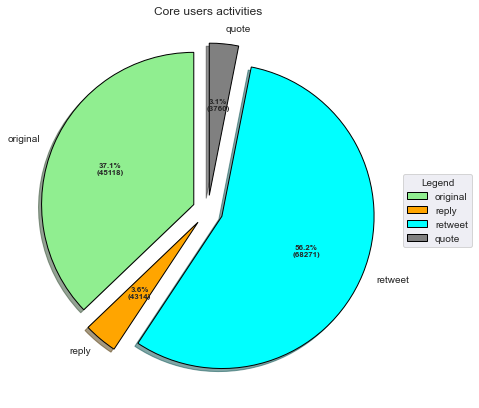

In [15]:
x = utils.split(df)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Core users activities", labels, values)

## Hashtags

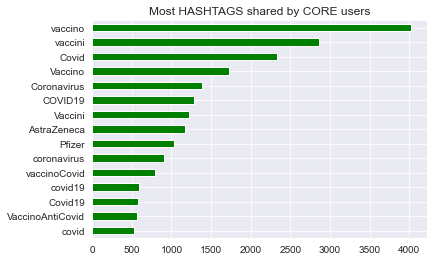

In [16]:
val = pd.Series(utils.hashtag_extraction(df)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most HASHTAGS shared by CORE users')
ax.invert_yaxis()
plt.show()

## Urls

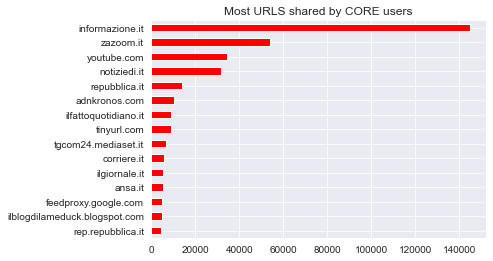

In [17]:
x = utils.extract_domain_list(df)
urls = []
lst_not_plot = ["twitter.com", "bit .ly", "ow.ly", "dlvr.it"]
cont = 0
for i in x:
    if i:
        for j in i:
            if j not in lst_not_plot:
                if j == "youtu.be":
                    j = "youtube.com"
                urls.append(j)
val = pd.Series(urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='red')
ax.set_title('Most URLS shared by CORE users')
ax.invert_yaxis()
plt.show()

## Active users

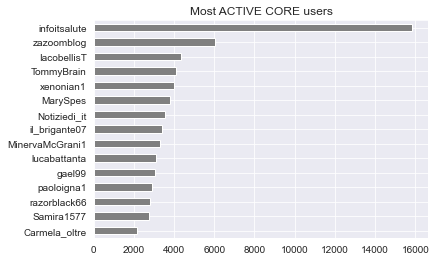

In [18]:
val = pd.Series(df["user_screen_name"]).value_counts().sort_values(ascending=False)
ax = val[:15].plot(kind='barh', color='grey')
ax.set_title('Most ACTIVE CORE users')
ax.invert_yaxis()
plt.show()

In [19]:
novax = list(pd.read_csv(r"..\files\bad.csv")["screen_name"])

In [20]:
len(df[df["user_screen_name"].isin(novax)]["user_screen_name"].unique())

10